<a href="https://colab.research.google.com/github/EmmaHenrique28/Java/blob/main/AI_Project1_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [438]:
#read the data file
df = pd.read_csv('cancer_data.csv')
df.head() #display first 5 rows

#remove some of the columns because we don't need
df.drop('Unnamed: 32', inplace=True, axis= 1)
df.drop('id', inplace=True, axis = 1)

#target output is a string, replace them to be integer values
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
print(df.head())

print()

#display the columns` title
columns_title = list(df.columns)
print(columns_title)

#convert ti numpy
data=df.to_numpy()

#split inputs and output data
data_in=data[:,1:] #inputs
data_out=data[:,0] #output (m,) vector

#print first 5 rows of outputs
print(data_out[:5])

#reshape data_out to match with the predicted output
data_out = np.reshape(data_out,(-1,1)) #dimension becomes (m,1)

#delete unnecesary variables to save some memory in colab
del data, df
#display the shape of inputs and outputs
print(f"input dim:{data_in.shape}")
print(f"output dim:{data_out.shape}")


   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [439]:
#split data into training and test sets

ratio = 0.7
len_tr = int(ratio*len(data_in))

#training dataset
tr_data_in = data_in[:len_tr]
tr_data_out = data_out[:len_tr]

#test dataset
test_data_in = data_in[len_tr:]
test_data_out = data_out[len_tr:]

#displaying the shape of inputs and outputs
print(f"number of train data: {tr_data_in.shape}")
print(f"number of test data: {test_data_in.shape}")



number of train data: (398, 30)
number of test data: (171, 30)


In [440]:
#generating polynomial features manually
#taking 2 combinaisons: x[0]**2 and x[0]*x[1]

#training data
x0x0 = tr_data_in[:,0]**2
x0x1 = tr_data_in[:,0]*tr_data_in[:,1]

#converting vector to matrix
x0x0 = np.reshape(x0x0,(-1,1))
x0x1 = np.reshape(x0x1,(-1,1))

tr_data_in_poly = np.concatenate((tr_data_in,x0x0,x0x1), axis = 1)

print(tr_data_in.shape)
print(tr_data_in_poly.shape)

#test data
x0x0 = test_data_in[:,0]**2
x0x1 = test_data_in[:,0]*test_data_in[:,1]

x0x0 = np.reshape(x0x0,(-1,1))
x0x1 = np.reshape(x0x1,(-1,1))

test_data_in_poly = np.concatenate((test_data_in,x0x0,x0x1), axis=1)
print(test_data_in.shape)
print(test_data_in_poly.shape)


(398, 30)
(398, 32)
(171, 30)
(171, 32)


In [441]:
#min-max normalizattion
#normalize input data using min-max approach
#We using training data to compute normalization parameters

tr_min = np.min(tr_data_in_poly, axis=0)
tr_max = np.max(tr_data_in_poly, axis=0)
tr_range = tr_max - tr_min

#print(tr_min)
#print(tr_max)
#print(tr_range)

tr_data_in_norm = (tr_data_in_poly - tr_min) / tr_range
test_data_in_norm = (test_data_in_poly - tr_min) / tr_range

#display first 5 rows
print(tr_data_in_norm[:5])
print()




[[0.52103744 0.0226581  0.54598853 0.3640416  0.68000973 0.7920373
  0.70313964 0.73111332 0.66844634 0.60551811 0.35614702 0.12046941
  0.3690336  0.28198282 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.69246032 0.14152452 0.75012578 0.56480227
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396
  0.37077387 0.1570435 ]
 [0.64314449 0.27257355 0.61578329 0.50201656 0.27047086 0.18176799
  0.20360825 0.34875746 0.34436733 0.14132266 0.15643672 0.08258929
  0.12444047 0.1289653  0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.67698413 0.30357143 0.60590307 0.54539855
  0.34755332 0.15456336 0.19297125 0.63917526 0.23358959 0.22287813
  0.50495209 0.45902047]
 [0.60149557 0.3902604  0.59574321 0.44979834 0.57294075 0.4310165
  0.46251172 0.63568588 0.48158035 0.21124684 0.22962158 0.09430251
  0.18037035 0.16745117 0.15083115 0.2839547  0.09676768 0.38984656
  0.20569032 0.12700551 0.62063492 0.36007463 0.5706859  0.46932364


In [442]:
#gradient descent algrothm loop
max_epoch = 10000
w = np.zeros((1,tr_data_in_norm.shape[1]), dtype=float) #initial parameters
b =0. #initial bias term
tr_err = [] #storing train error in each epoch
test_err = [] #storing test error in each epoch
lr = 0.4

def sigmoid(z): #function for sigmoid formula (z)
  return 1 / (1+np.exp(-z))

for epoch in range(max_epoch):
  m = len(tr_data_in_norm)

  #compute model prediction on train set
  a = np.matmul(tr_data_in_norm, w.T) + b
  ypred = sigmoid(a)
  e = -(1/m)*np.sum(tr_data_out * np.log(ypred) + (1 - tr_data_out) *np.log(1-ypred), axis =0)
  tr_err.append(e.squeeze()) #append e to tr_err

  #compute model prediction on test set
  a_test = np.matmul(test_data_in_norm, w.T) + b
  ypred_test = sigmoid(a_test)
  e_test = -(1/m) * np.sum(test_data_out *np.log(ypred_test) + (1 - test_data_out) * np.log(1 - ypred_test), axis=0)
  test_err.append(e_test.squeeze()) #append e_test to test_err

  #store the mse

  #train set
  e = np.mean((ypred - tr_data_out)**2, axis=0)
  tr_err.append(e.squeeze())

  #test set
  e2 = np.mean((ypred_test - test_data_out)**2, axis=0)
  test_err.append(e2.squeeze())

  #gradient descent to update the weights and bias
  dw = np.matmul((ypred - tr_data_out).T, tr_data_in_norm) / m
  db = np.sum(ypred - tr_data_out) / m

  w = w -lr * dw
  b = b- lr *db

  print(f"epoch {epoch}/{max_epoch}  loss(train): {tr_err[-1]:.4f}  loss(test): {test_err[-1]:.4f}")



Streaming output truncated to the last 5000 lines.
epoch 5000/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5001/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5002/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5003/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5004/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5005/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5006/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5007/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5008/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5009/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5010/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5011/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5012/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5013/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5014/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5015/10000  loss(train): 0.0204  loss(test): 0.0268
epoch 5016/10000  los

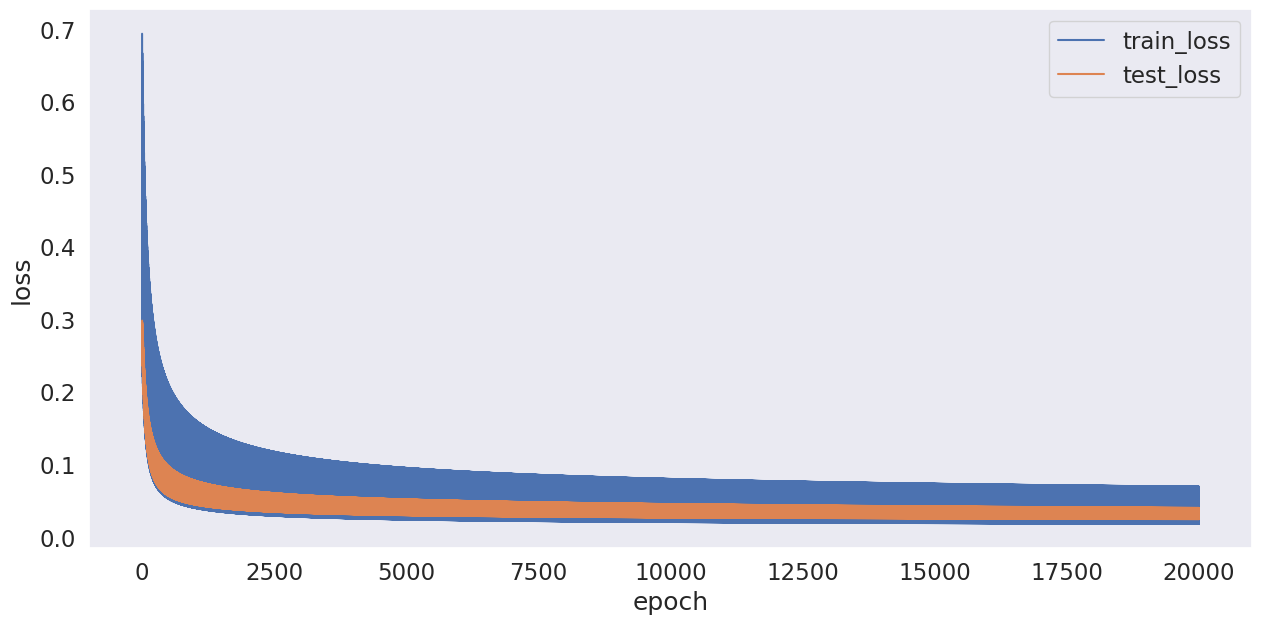

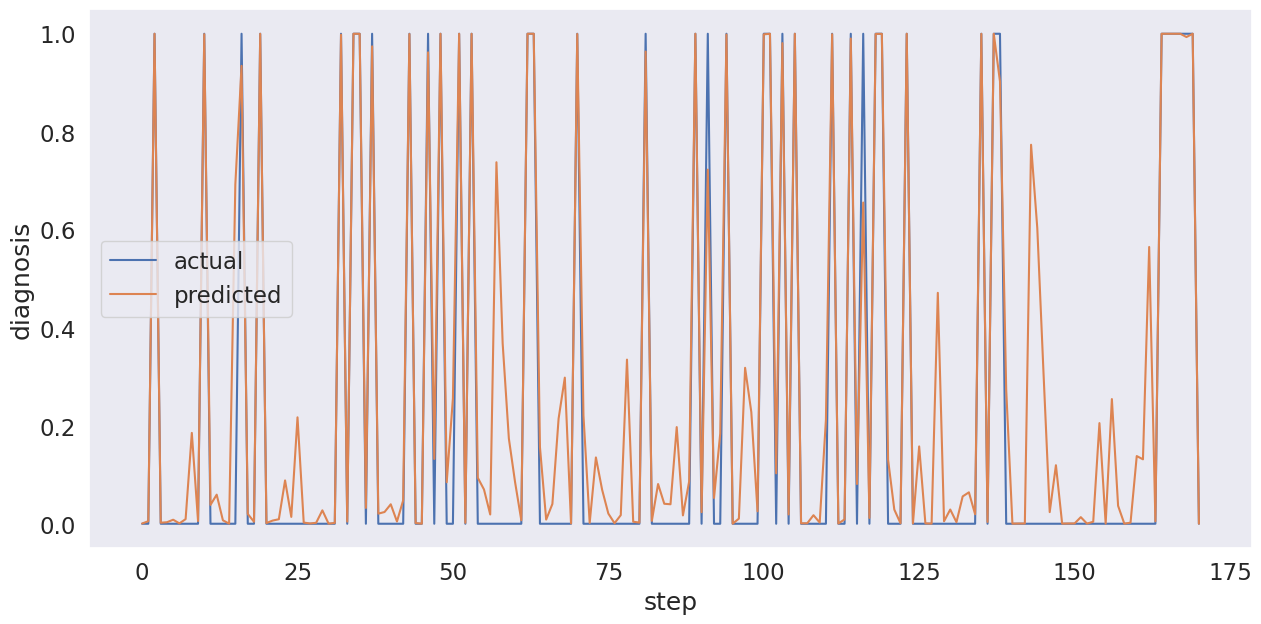

In [443]:
#Plot learning and test curve

plt.figure(figsize = (15,7))
plt.plot(tr_err, label="train_loss")
plt.plot(test_err, label="test_loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()

#Generate test dataset prediction
plt.figure(figsize = (15,7))
plt.plot(test_data_out,label="actual")
plt.plot(ypred_test,label="predicted")
plt.xlabel('step')
plt.ylabel('diagnosis')
plt.grid()
plt.legend()
plt.show()



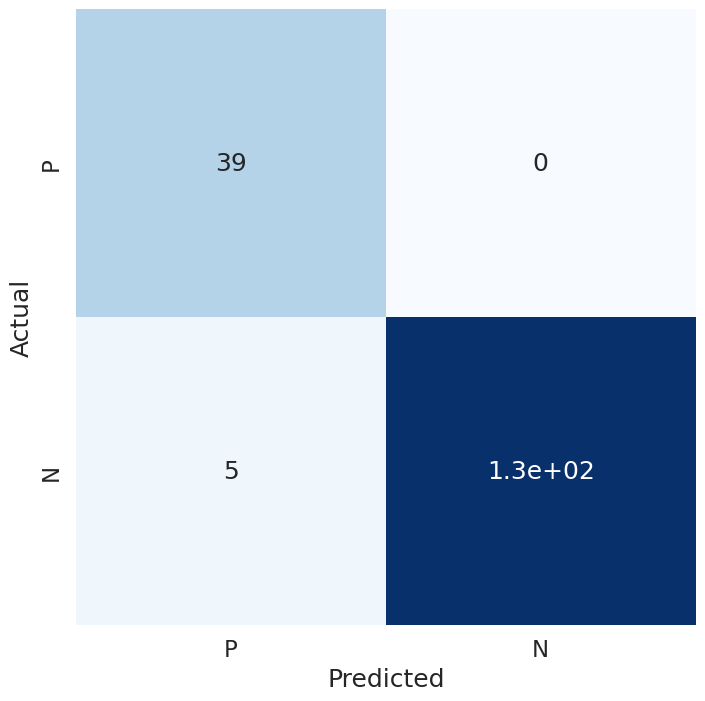

[[ 39   0]
 [  5 127]]


In [444]:
#helper function to plot confusion matrix

def plot_conf_mat(conf_mat):
    class_label = ["P", "N"]
    plt.subplots(figsize=(8,8))
    sns.set(font_scale=1.5) #adjusting the font
    sns.heatmap(conf_mat,
              annot=True,
              cbar=False,
              xticklabels=class_label,
              yticklabels=class_label,
              cmap='Blues' )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#function to calculate confusion matrix
def calculate_confusion_matrix(actual,predicted):
    #initial Confusion matrix
    conf_mat = np.zeros((2,2), dtype=int)

    #update Confusion matrix
    for a, p in zip(actual, predicted):
      if(a==1):
        if(p==1):
          conf_mat[0, 0] +=1
        else:
          conf_mat[0, 1] +=1
      elif(a==0):
              if(p==1):
                conf_mat[1, 0] +=1
              else:
                  conf_mat[1, 1] +=1
    return conf_mat

 #update predictions on the test set
ypred_test = sigmoid(np.matmul(test_data_in_norm,  w.T) + b)
ypred_test_binary = np.round(ypred_test)

 #calculate the confusion matrix for the test set
confusion_matrix_test = calculate_confusion_matrix(test_data_out, ypred_test_binary)

 #print the confusion matrix for the test set
plot_conf_mat(confusion_matrix_test)
print(confusion_matrix_test)


In [445]:
#Compute F1 score, precision, recall and accuracy using confusion matrix
#values
TP = confusion_matrix_test[0,0]
FN = confusion_matrix_test[0,1]
FP = confusion_matrix_test[1,0]
TN = confusion_matrix_test[1,1]

Accuracy = (TP + TN ) / (TP + TN + FP + FN)
Precision = (TP) / (TP + FP)
Recall = (TP) / (TP + FN)
F1Score = 2 * (Precision * Recall) / (Precision + Recall)

print(f"Accuracy: {Accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1Score: {F1Score:.4f}")




Accuracy: 0.9708
Precision: 0.8864
Recall: 1.0000
F1Score: 0.9398


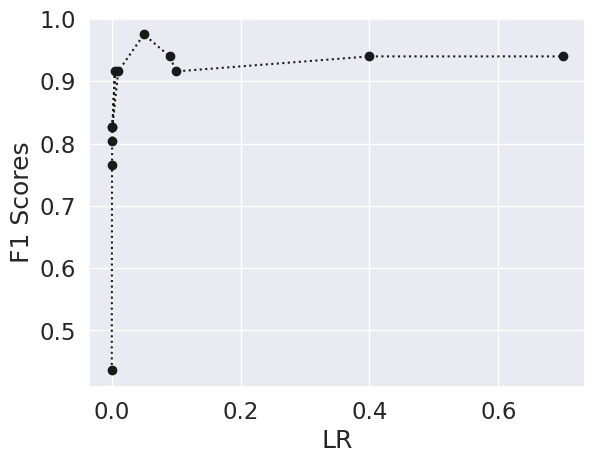

In [446]:
## test each learning rate and obtained F1 score for each one
#do experiments one by one and fill the F1 scores manually
#use test dataset

LR = [0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.001, 0.01, 0.05, 0.09, 0.1, 0.4, 0.7]

# you need to update F1_score_list
F1_score_list = [0.4358, 0.7647, 0.8041, 0.8261, 0.9157, 0.8261, 0.9157, 0.9750, 0.9398, 0.9157, 0.9398, 0.9398]

plt.plot(LR, F1_score_list, 'o:k')
plt.xlabel("LR")
plt.ylabel("F1 Scores")
plt.show()